In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [128]:
X,y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [129]:
np.random.seed(42)

In [130]:
X.shape

(70000, 784)

In [131]:
X = X.to_numpy()
y = y.to_numpy()

In [132]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3, shuffle=False)
y_train[-1]

'6'

In [133]:
y_train[-1]

'6'

In [134]:
y_train_6 = np.ones(len(y_train[y_train=='6']))
y_train_9 = np.zeros(len(y_train[y_train=='9']))
y_train_69 = np.concatenate((y_train_6,y_train_9),axis=0)

In [135]:
idx6 = np.where(y_train=='6')
idx9 = np.where(y_train=='9')

X_train_6 = X_train[idx6]
X_train_9 = X_train[idx9]
X_train_69 = np.concatenate ( (X_train_6, X_train_9),axis=0)

In [136]:
X_train_69.shape,y_train_69.shape

((9746, 784), (9746,))

In [137]:
from sklearn.utils import shuffle
X_train_69,y_train_69=shuffle(X_train_69,y_train_69,random_state=1729)

In [138]:
y_test_6 = np.ones(len(y_test[y_test=='6']))
y_test_9 = np.zeros(len(y_test[y_test=='9']))
y_test_69 = np.concatenate((y_test_6,y_test_9))

idx6 = np.where(y_test=='6')
idx9 = np.where(y_test=='9')

X_test_6 = X_test[idx6]
X_test_9 = X_test[idx9]
X_test_69 = np.concatenate ( (X_test_6, X_test_9),axis=0)

 sum of all the labels in the vector (y_train_69)

In [139]:
y_train_69.sum()

4855.0

In [140]:
y_test_69.sum()

2021.0

Apply StandardScaler to all the training samples in x_train_69

In [141]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_69Tf = scaler.fit_transform(X_train_69)

X_train_69Tf[0].mean(),X_train_69Tf[:,0].mean() ,X_train_69Tf[0].std(), X_train_69Tf[:,0].std()

(0.08128379559427823, 0.0, 0.7358823226037738, 0.0)

In [142]:
from warnings import filterwarnings
filterwarnings('ignore')

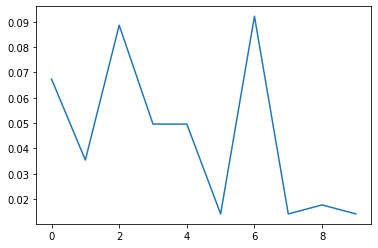

In [143]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
clfA = SGDClassifier(loss='log', random_state=10, max_iter=1, eta0=0.01, warm_start=True, learning_rate='constant')

lossA =[]
iterations = 10
for i in range (iterations):
  clfA.fit(X_train_69,y_train_69)
  y_pred = clfA.predict_proba(X_train_69)
  lossA.append(log_loss(y_train_69,y_pred))

plt.plot(lossA)

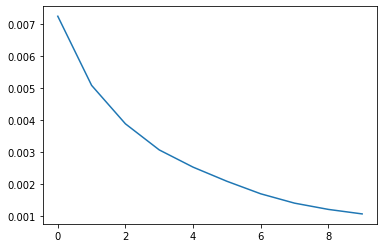

In [144]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
clfB = SGDClassifier(loss='log', random_state=10, max_iter=1, eta0=0.000001, warm_start=True, learning_rate='constant' )

lossB =[]
iterations = 10
for i in range (iterations):
  clfB.fit(X_train_69,y_train_69)
  y_pred = clfB.predict_proba(X_train_69)
  lossB.append(log_loss(y_train_69,y_pred))

plt.plot(lossB)

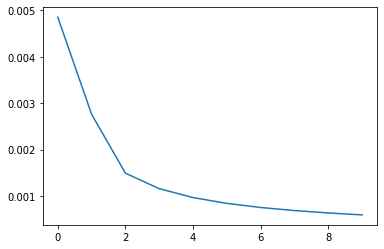

In [145]:
X_train_69_scaled = StandardScaler().fit_transform(X_train_69)
clfC = SGDClassifier(loss='log', random_state=10, max_iter=1, eta0=0.01, warm_start=True, learning_rate='constant')

lossC =[]
iterations = 10
for i in range (iterations):
  clfC.fit(X_train_69_scaled,y_train_69)
  y_pred = clfC.predict_proba(X_train_69_scaled)
  lossC.append(log_loss(y_train_69,y_pred))

plt.plot(lossC)

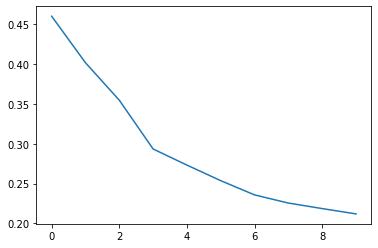

In [146]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
clfD = SGDClassifier(loss='log', random_state=10, max_iter=1, warm_start=True, eta0=0.01,learning_rate='invscaling', power_t=1)

lossD =[]
iterations = 10
for i in range (iterations):
  clfD.fit(X_train_69,y_train_69)
  y_pred = clfD.predict_proba(X_train_69)
  lossD.append(log_loss(y_train_69,y_pred))

plt.plot(lossD)

# Graded

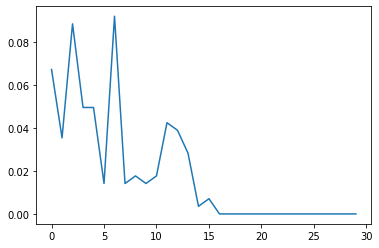

In [148]:
clf2A = SGDClassifier(loss='log', random_state=10, max_iter=1, warm_start=True, eta0=0.01,learning_rate='constant')

loss2A =[]
iterations = 30
for i in range (iterations):
  clf2A.fit(X_train_69,y_train_69)
  y_pred = clf2A.predict_proba(X_train_69)
  loss2A.append(log_loss(y_train_69,y_pred))

plt.plot(loss2A)

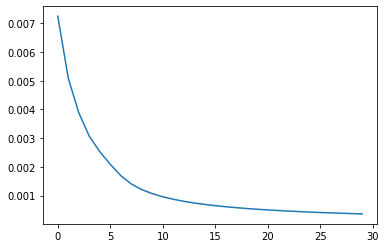

In [149]:
clf2B = SGDClassifier(loss='log', random_state=10, max_iter=1, warm_start=True, eta0=0.000001,learning_rate='constant')

loss2B =[]
iterations = 30
for i in range (iterations):
  clf2B.fit(X_train_69,y_train_69)
  y_pred = clf2B.predict_proba(X_train_69)
  loss2B.append(log_loss(y_train_69,y_pred))

plt.plot(loss2B)

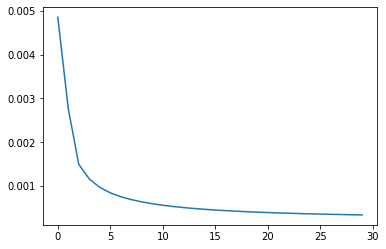

In [151]:
X_train_69_scaled = StandardScaler().fit_transform(X_train_69)
clf2C = SGDClassifier(loss='log', random_state=10, max_iter=1, eta0=0.01, warm_start=True, learning_rate='constant')

loss2C =[]
iterations = 30
for i in range (iterations):
  clf2C.fit(X_train_69_scaled,y_train_69)
  y_pred = clf2C.predict_proba(X_train_69_scaled)
  loss2C.append(log_loss(y_train_69,y_pred))

plt.plot(loss2C)

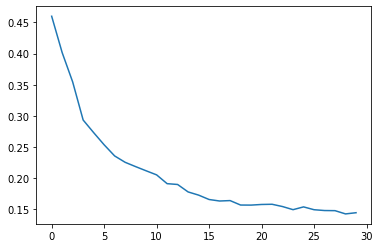

In [152]:
clf2D = SGDClassifier(loss='log', random_state=10, max_iter=1, warm_start=True, eta0=0.01,learning_rate='invscaling', power_t=1)

loss2D =[]
iterations = 30
for i in range (iterations):
  clf2D.fit(X_train_69,y_train_69)
  y_pred = clf2D.predict_proba(X_train_69)
  loss2D.append(log_loss(y_train_69,y_pred))

plt.plot(loss2D)

In [159]:
for i in range(len(loss2A)):
  print(f'{i}, {loss2A[i]:.2f}')
  if round(loss2A[i], 2)==0:
    break

0, 0.07
1, 0.04
2, 0.09
3, 0.05
4, 0.05
5, 0.01
6, 0.09
7, 0.01
8, 0.02
9, 0.01
10, 0.02
11, 0.04
12, 0.04
13, 0.03
14, 0.00


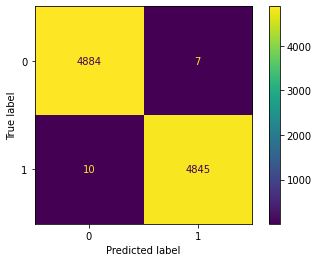

In [164]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
clf3 = SGDClassifier(loss='log', random_state=10, max_iter=10, eta0=0.5,alpha=0,learning_rate='invscaling', power_t=0.5, shuffle=True)

clf3.fit(X_train_69,y_train_69)
y_pred3 = clf3.predict(X_train_69)

cm3 = confusion_matrix(y_train_69,y_pred3)
disp = ConfusionMatrixDisplay(cm3)
disp.plot()

In [172]:
FPidx = []
for i in range(len(y_train_69)):
  if y_pred3[i]==1 and y_train_69[i]==0:
    FPidx.append(i)
FPidx[0]

2167

In [176]:
from sklearn.datasets import fetch_20newsgroups

In [195]:
X,y = fetch_20newsgroups(return_X_y=True)

In [198]:
type(X),type(y)

(list, numpy.ndarray)

In [199]:
len(X),y.size

(11314, 11314)

In [200]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [206]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

In [214]:
from sklearn.pipeline import Pipeline
nb = Pipeline([('tfid', TfidfVectorizer()),('mnb',MultinomialNB())])

nb.fit(X_train,y_train)
nb.score(X_test,y_test)

0.845360824742268